In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [18]:
X,y = make_blobs(n_samples=500, n_features=2, centers = 5, random_state=3)
print(X.shape, y.shape)

(500, 2) (500,)


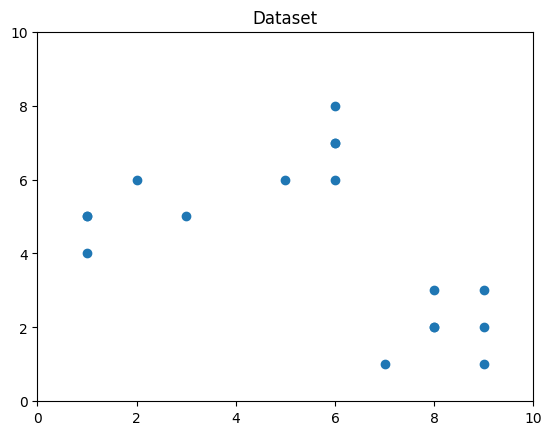

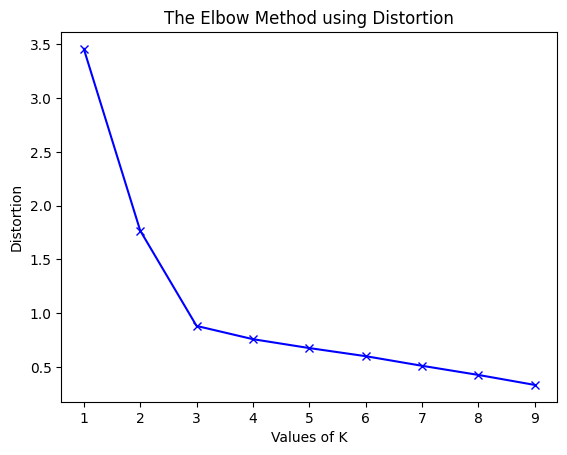

In [50]:
# elbow method to find a good value for k
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
  
# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

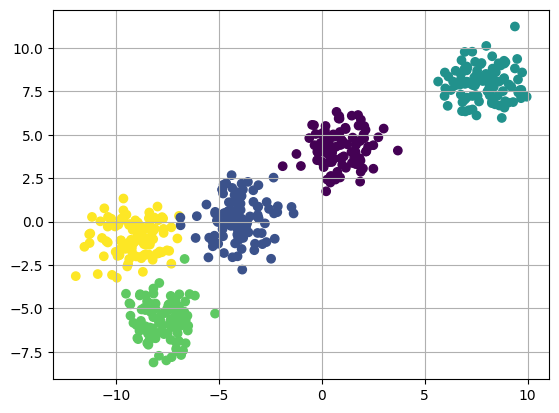

In [19]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [20]:
k=5
colors = ['green', 'blue', 'red', 'yellow', 'orange']
clusters = {}
for idx in range(k):
    center = (2*np.random.random(X.shape[1]) -1)*10
    points = []
    cluster = {
        'center': center,
        'points': [],
        'color': colors[idx]
    }
    clusters[idx] = cluster
clusters

{0: {'center': array([ 9.82594371, -8.9133345 ]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-9.00397107,  2.30411343]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([-6.97727237, -0.06491333]),
  'points': [],
  'color': 'red'},
 3: {'center': array([-7.94920181, -2.79935654]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([ 5.8437634 , -8.17022083]),
  'points': [],
  'color': 'orange'}}

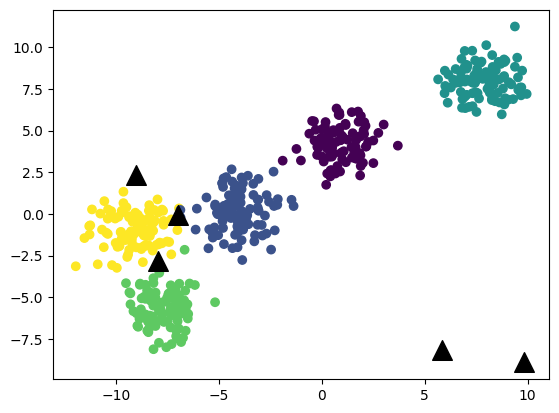

In [21]:
plt.scatter(X[:,0], X[:,1], c=y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], c='black', marker='^', s=200)
plt.show()

In [22]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))
v1 = np.array([2, 2])
v2 = np.array([4, 4])
print(distance(v1, v2))

2.8284271247461903


In [23]:
# Implementing E step
def assign_cluster():
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist) # gives the index of the minimum value
        clusters[curr_cluster]['points'].append(curr_x)

In [24]:
assign_cluster()
clusters

{0: {'center': array([ 9.82594371, -8.9133345 ]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-9.00397107,  2.30411343]),
  'points': [array([-10.3969262 ,  -0.28827972]),
   array([-10.22494442,   0.16581105]),
   array([-11.29535476,  -0.73378326]),
   array([-10.38104879,   0.26793302]),
   array([-10.2752758 ,  -0.16826591]),
   array([-10.75491526,   0.01578892]),
   array([-9.8773221 , -0.17517456]),
   array([-10.0355668 ,  -0.28143508]),
   array([-9.63301578,  1.32811375]),
   array([-11.16012981,   0.26756898]),
   array([-11.2432042 ,  -0.68600013]),
   array([-9.71913179,  0.18156338]),
   array([-9.64202715,  0.10740227]),
   array([-9.48733708,  0.39835963]),
   array([-10.56023252,   0.76396703]),
   array([-9.63341735,  0.64589168])],
  'color': 'blue'},
 2: {'center': array([-6.97727237, -0.06491333]),
  'points': [array([-3.61995355, -0.07726913]),
   array([-4.65743008,  0.05077508]),
   array([7.44598269, 9.20313614]),
   array([-3.8987193 ,  0.152191

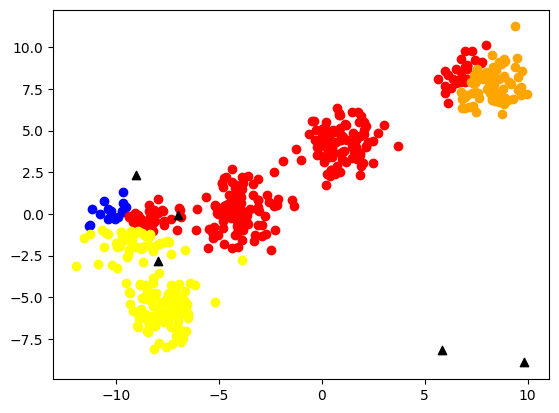

In [25]:
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], c="black", marker='^')
    plt.show()
plot_clusters()

In [27]:
# Implementing M step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            clusters[idx]['center'] = new_center
            clusters[idx]['points'] = []

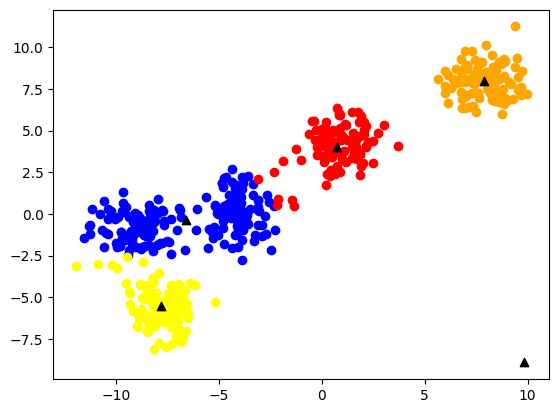

In [43]:
assign_cluster()
plot_clusters()
update_clusters()

# algo. is stuck at local minima and therefore poor result
# reason -- poor random initialization
# answer -- Roubust seed selection algo for k-means research paper
# k-means++ algo. for random initialization

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

In [45]:
X,y = make_blobs(n_samples=500, n_features=2, centers = 5, random_state=3)
km.fit(X,y)

KMeans(n_clusters=5)

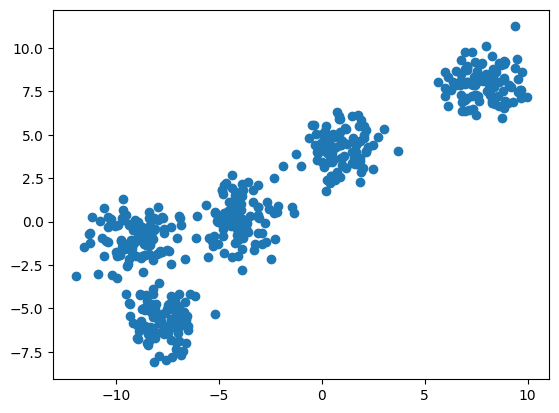

In [47]:
centers = km.cluster_centers_ # coordinates of cluster centers
labels = km.labels_ # labels of each point regarding which cluster it belongs to
plt.scatter(X[:,0],X[:,1])
plt.show()

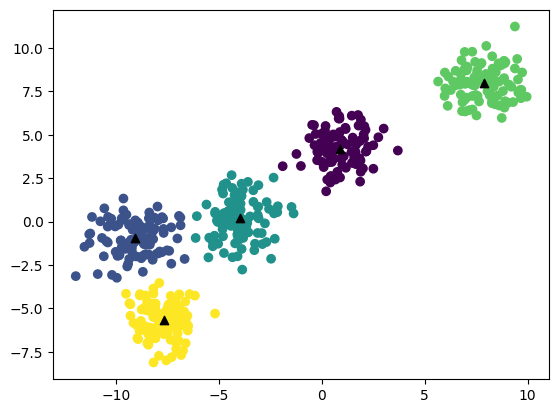

In [49]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c="black",marker="^")
plt.show()